In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, TensorBoard
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.backend import clear_session
import gc

In [2]:
data = pd.read_csv('all_data_results_cleaned.csv')

In [3]:
data

,pipe_dn,pipe_schedule,flange_class,outside_diameter,length1,length2,wall_thickness,lumped_mass,raised_face_depth,w_neck_c,...,flange_thickness_d,raised_face_radius,x_deformation_position,y_deformation_position,z_deformation_position,frequency,support_right,support_left,support,allowable_deformation
0,50,40,150,60.3,3064.0,3964.0,3.91,0.0,1.5,63.5,...,17.6,45.95,-408.36,0.00,30.150,6.3338,Fixed,Fixed,Fixed_Fixed,13.137
1,50,40,150,60.3,4519.0,4102.0,3.91,0.0,1.5,63.5,...,17.6,45.95,243.13,0.00,30.150,4.2808,Fixed,Fixed,Fixed_Fixed,19.284
2,50,40,150,60.3,4490.0,947.0,3.91,0.0,1.5,63.5,...,17.6,45.95,1725.90,16.97,21.279,11.8597,Fixed,Fixed,Fixed_Fixed,25.803
3,50,40,150,60.3,4134.0,4184.0,3.91,0.0,1.5,63.5,...,17.6,45.95,-67.41,0.00,30.150,4.5764,Fixed,Fixed,Fixed_Fixed,17.892
4,50,40,150,60.3,469.0,729.0,3.91,0.0,1.5,63.5,...,17.6,45.95,-117.03,0.00,30.150,155.6812,Fixed,Fixed,Fixed_Fixed,0.343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12284,400,XS,600,406.4,2710.0,1209.0,12.70,2090.0,6.4,177.8,...,76.2,234.95,610.42,0.00,203.200,25.6742,Pinned,Pinned,Pinned_Pinned,0.837
12285,400,XS,600,406.4,675.0,3372.0,12.70,2090.0,6.4,177.8,...,76.2,234.95,-1158.80,0.00,203.200,33.5301,Pinned,Pinned,Pinned_Pinned,0.821
12286,400,XS,600,406.4,3260.0,361.0,12.70,2090.0,6.4,177.8,...,76.2,234.95,1277.60,0.00,-203.200,50.7362,Pinned,Pinned,Pinned_Pinned,1.067
12287,400,XS,600,406.4,3673.0,4155.0,12.70,2090.0,6.4,177.8,...,76.2,234.95,-82.60,0.00,342.900,7.5596,Pinned,Pinned,Pinned_Pinned,2.934


In [4]:
mask = data["support"] == "Fixed_Free"
data = data.drop(data[mask].index)

In [5]:
"""mask2= data["x_deformation_position"] > 3000
print(mask2)
data = data.drop(data[mask2].index)"""

'mask2= data["x_deformation_position"] > 3000\nprint(mask2)\ndata = data.drop(data[mask2].index)'

In [6]:
to_drop=["pipe_dn","pipe_schedule","flange_class",
        "support_right", "support_left"]
to_keep=["outside_diameter", "wall_thickness", "raised_face_depth",
        "w_neck_c", "flange_outer_radius", "flange_thickness_d","raised_face_radius",
        "length1", "length2", "lumped_mass", "frequency", "x_deformation_position",
        "y_deformation_position", "z_deformation_position", "support", "allowable_deformation"]

data.drop(columns=to_drop,inplace=True)

In [7]:
numeric_features = ["outside_diameter", "wall_thickness", "raised_face_depth" ,'length1', 'length2', 'lumped_mass',
                    "w_neck_c", "flange_outer_radius", "flange_thickness_d","raised_face_radius"]
categorical_features = ['support']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop=None), categorical_features)
    ])

In [8]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [9]:
output_columns = ['allowable_deformation', 'frequency', 'x_deformation_position', 'y_deformation_position', 'z_deformation_position']
x = data.drop(output_columns, axis=1)
y = pd.DataFrame(data[output_columns])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [11]:
x_train_transformed = pipeline.fit_transform(x_train)
x_test_transformed = pipeline.transform(x_test)

In [12]:
scaler_y_frequency = StandardScaler()
scaler_y_allowable_deformation = StandardScaler()
scaler_y_x_position = StandardScaler()


#y_train_transformed_frequency = scaler_y_frequency.fit_transform(pd.DataFrame(y_train["frequency"]))
#y_test_transformed_frequency = scaler_y_frequency.transform(pd.DataFrame(y_test["frequency"]))

#y_train_transformed_allowable_deformation = scaler_y_allowable_deformation.fit_transform(pd.DataFrame(y_train["allowable_deformation"]))
#y_test_transformed_allowable_deformation = scaler_y_allowable_deformation.transform(pd.DataFrame(y_test["allowable_deformation"]))

y_train_transformed_x_position = scaler_y_x_position.fit_transform(pd.DataFrame(y_train["x_deformation_position"]))
y_test_transformed_x_position = scaler_y_x_position.transform(pd.DataFrame(y_test["x_deformation_position"]))



In [13]:
logdir = "logs/x_position_measurements/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [14]:
input_layer = Input(shape=(x_train_transformed.shape[1],))
hidden1 = Dense(512, activation='relu')(input_layer)
dropout1 = Dropout(0.2)(hidden1)
hidden2 = Dense(64, activation='relu')(dropout1)


# Separate output for each target variable
output_layer = Dense(1)(hidden2)
#, name='allowable_deformation'


In [15]:
model = Model(inputs=input_layer, outputs=output_layer)

In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,065 (156.50 KB)

 Trainable params: 40,065 (156.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=["R2Score"])

In [18]:
history = model.fit(
    x_train_transformed, 
    y_train_transformed_x_position,  # Split the targets into separate arrays
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[tensorboard_callback]
)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - R2Score: 0.8140 - loss: 0.1842 - val_R2Score: 0.9839 - val_loss: 0.0157
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.9745 - loss: 0.0258 - val_R2Score: 0.9845 - val_loss: 0.0152
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - R2Score: 0.9785 - loss: 0.0218 - val_R2Score: 0.9856 - val_loss: 0.0141
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.9781 - loss: 0.0217 - val_R2Score: 0.9877 - val_loss: 0.0120
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.9796 - loss: 0.0206 - val_R2Score: 0.9878 - val_loss: 0.0119
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.9781 - loss: 0.0219 - val_R2Score: 0.9882 - val_loss: 0.0116
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.9844 - loss: 0.0159 - val_R2Score: 0.9875 - val_loss: 0.0122
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.9794 - loss: 0.0206 - val_R2Score: 0.9888 - v

In [19]:
test_loss, test_mse = model.evaluate(x_test_transformed, y_test_transformed_x_position)
print('Test accuracy:', test_mse)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - R2Score: 0.9274 - loss: 0.0736
Test accuracy: 0.9678120017051697


In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,197 (469.52 KB)

 Trainable params: 40,065 (156.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80,132 (313.02 KB)

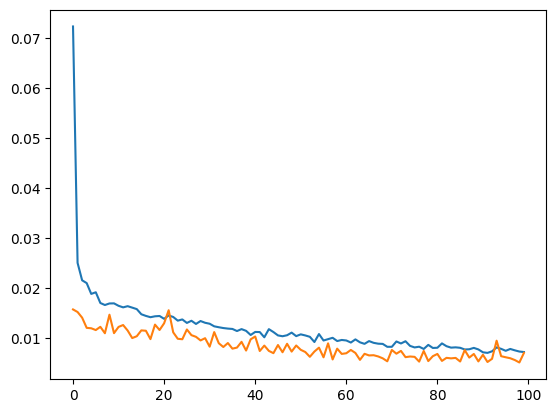

In [21]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")

In [22]:
predictions_scaled = model.predict(x_test_transformed)
predictions = scaler_y_x_position.inverse_transform((predictions_scaled))

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [23]:
predictions_df = pd.DataFrame(predictions)
print("\nSample Predictions:")
print(predictions_df)


Sample Predictions:
                0
0    -1010.484802
1      423.182770
2     2150.504883
3     -216.312439
4     -722.525574
...           ...
1866   386.396851
1867   482.498962
1868   -58.286346
1869  1186.545898
1870   771.972290

[1871 rows x 1 columns]


In [24]:
y_test["x_deformation_position"]

1772    -1011.60
9378      468.28
6933     2249.40
1388     -219.39
7101     -769.73
          ...   
6919      351.74
2744      532.21
432      -130.18
10611    1244.30
8969      769.36
Name: x_deformation_position, Length: 1871, dtype: float64

In [25]:
true= y_test["x_deformation_position"].tolist()
pred= predictions_df[0].tolist()
mean_squared_error(true,pred)

26014.454701586703

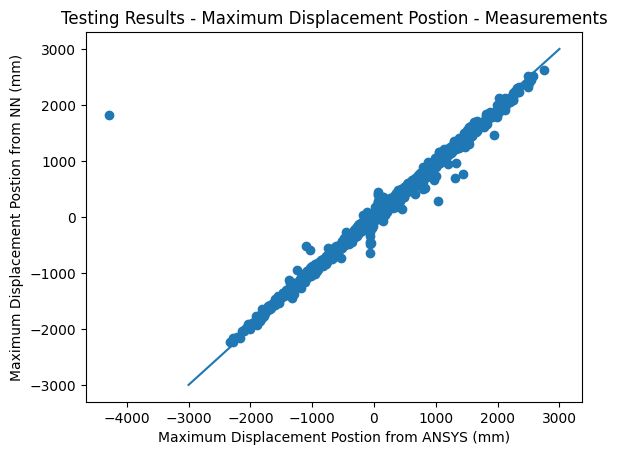

In [42]:
pred=predictions_df
ansys=y_test["x_deformation_position"]
plt.scatter(ansys,pred)
#plt.loglog()
plt.plot([-3000, 3000],[-3000, 3000])

plt.xlabel("Maximum Displacement Postion from ANSYS (mm)")
plt.ylabel("Maximum Displacement Postion from NN (mm)")
plt.title("Testing Results - Maximum Displacement Postion - Measurements")
plt.show()

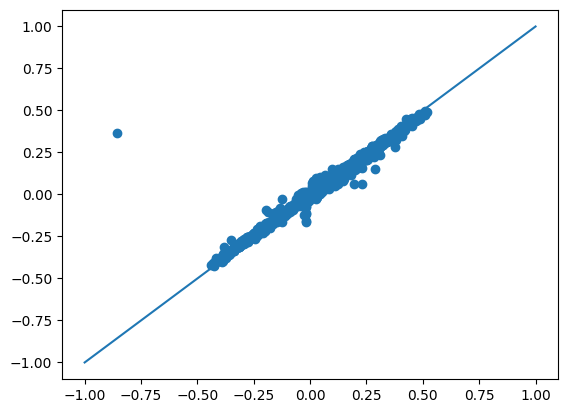

0.9671353534937359

In [27]:
length = x_test["length1"]+x_test["length2"]

ansys=y_test["x_deformation_position"]/length
length = pd.DataFrame(length)
length.reset_index(drop=True,inplace=True)

pred=predictions_df/length

plt.scatter(ansys,pred)
#plt.loglog()
plt.plot([-1, 1],[-1, 1])
plt.show()

mean_squared_error(ansys,pred)
r2_score(ansys,pred)

In [28]:
x_test["length1"]

1772     2248.0
9378     4565.0
6933     4412.0
1388      837.0
7101     1085.0
          ...  
6919     2741.0
2744     4964.0
432      3259.0
10611    2953.0
8969     3288.0
Name: length1, Length: 1871, dtype: float64

In [29]:
y_test["x_deformation_position"]

1772    -1011.60
9378      468.28
6933     2249.40
1388     -219.39
7101     -769.73
          ...   
6919      351.74
2744      532.21
432      -130.18
10611    1244.30
8969      769.36
Name: x_deformation_position, Length: 1871, dtype: float64

In [30]:
plot_df=pd.DataFrame()

plot_df["length1"] = x_test["length1"]
plot_df["length2"] = x_test["length2"]
plot_df["x_deformation_position"] = y_test["x_deformation_position"]
plot_df["support"] = x_test["support"]

plot_df["x_postion"] = plot_df["length2"]+plot_df["x_deformation_position"]
plot_df["total_length"] = plot_df["length1"]+plot_df["length2"]

plot_df["position_ratio_ANSYS"] = plot_df["x_postion"]/plot_df["total_length"]

plot_df.reset_index(drop=False,inplace=True)

plot_df["x_deformation_position_NN"] = predictions_df[0]

plot_df["x_deformation_position_NN_total_length"] = plot_df["length2"] + plot_df["x_deformation_position_NN"]
plot_df["position_ratio_NN"] = plot_df["x_deformation_position_NN_total_length"]/plot_df["total_length"]
plot_df["flange_ratio"] = plot_df["length2"]/plot_df["total_length"]

plot_df

,index,length1,length2,x_deformation_position,support,x_postion,total_length,position_ratio_ANSYS,x_deformation_position_NN,x_deformation_position_NN_total_length,position_ratio_NN,flange_ratio
0,1772,2248.0,4946.0,-1011.60,Fixed_Fixed,3934.40,7194.0,0.546900,-1010.484802,3935.515198,0.547055,0.687517
1,9378,4565.0,3495.0,468.28,Pinned_Pinned,3963.28,8060.0,0.491722,423.182770,3918.182770,0.486127,0.433623
2,6933,4412.0,757.0,2249.40,Pinned_Fixed,3006.40,5169.0,0.581621,2150.504883,2907.504883,0.562489,0.146450
3,1388,837.0,1442.0,-219.39,Fixed_Fixed,1222.61,2279.0,0.536468,-216.312439,1225.687561,0.537818,0.632734
4,7101,1085.0,3751.0,-769.73,Pinned_Fixed,2981.27,4836.0,0.616474,-722.525574,3028.474426,0.626235,0.775641
...,...,...,...,...,...,...,...,...,...,...,...,...
1866,6919,2741.0,2755.0,351.74,Pinned_Fixed,3106.74,5496.0,0.565273,386.396851,3141.396851,0.571579,0.501274
1867,2744,4964.0,3631.0,532.21,Fixed_Fixed,4163.21,8595.0,0.484376,482.498962,4113.498962,0.478592,0.422455
1868,432,3259.0,3428.0,-130.18,Fixed_Fixed,3297.82,6687.0,0.493169,-58.286346,3369.713654,0.503920,0.512636
1869,10611,2953.0,302.0,1244.30,Pinned_Pinned,1546.30,3255.0,0.475054,1186.545898,1488.545898,0.457311,0.092780


In [31]:
data["x_postion"] = data["length2"]+data["x_deformation_position"]
data["total_length"] = data["length1"]+data["length2"]

data["position_ratio_ALL"] = data["x_postion"]/data["total_length"]
data["flange_ratio"] = data["length2"]/data["total_length"]

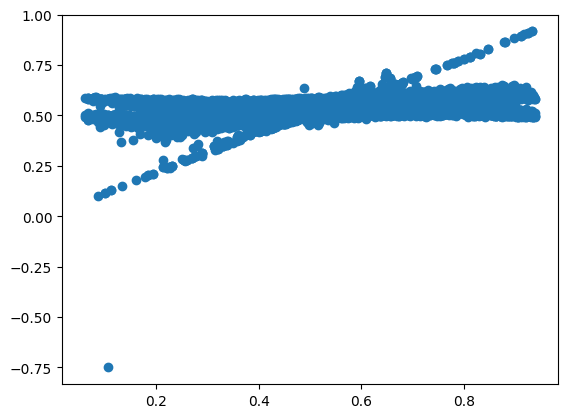

In [32]:
plt.scatter(data["flange_ratio"],data["position_ratio_ALL"])

In [33]:
data["temp"]=data["flange_ratio"]/data["position_ratio_ALL"]

In [34]:
data

,outside_diameter,length1,length2,wall_thickness,lumped_mass,raised_face_depth,w_neck_c,flange_outer_radius,flange_thickness_d,raised_face_radius,...,y_deformation_position,z_deformation_position,frequency,support,allowable_deformation,x_postion,total_length,position_ratio_ALL,flange_ratio,temp
0,60.3,3064.0,3964.0,3.91,0.0,1.5,63.5,76.2,17.6,45.95,...,0.00,30.150,6.3338,Fixed_Fixed,13.137,3555.64,7028.0,0.505925,0.564030,1.114849
1,60.3,4519.0,4102.0,3.91,0.0,1.5,63.5,76.2,17.6,45.95,...,0.00,30.150,4.2808,Fixed_Fixed,19.284,4345.13,8621.0,0.504017,0.475815,0.944045
2,60.3,4490.0,947.0,3.91,0.0,1.5,63.5,76.2,17.6,45.95,...,16.97,21.279,11.8597,Fixed_Fixed,25.803,2672.90,5437.0,0.491613,0.174177,0.354297
3,60.3,4134.0,4184.0,3.91,0.0,1.5,63.5,76.2,17.6,45.95,...,0.00,30.150,4.5764,Fixed_Fixed,17.892,4116.59,8318.0,0.494901,0.503006,1.016375
4,60.3,469.0,729.0,3.91,0.0,1.5,63.5,76.2,17.6,45.95,...,0.00,30.150,155.6812,Fixed_Fixed,0.343,611.97,1198.0,0.510826,0.608514,1.191235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12284,406.4,2710.0,1209.0,12.70,2090.0,6.4,177.8,342.9,76.2,234.95,...,0.00,203.200,25.6742,Pinned_Pinned,0.837,1819.42,3919.0,0.464256,0.308497,0.664497
12285,406.4,675.0,3372.0,12.70,2090.0,6.4,177.8,342.9,76.2,234.95,...,0.00,203.200,33.5301,Pinned_Pinned,0.821,2213.20,4047.0,0.546874,0.833210,1.523586
12286,406.4,3260.0,361.0,12.70,2090.0,6.4,177.8,342.9,76.2,234.95,...,0.00,-203.200,50.7362,Pinned_Pinned,1.067,1638.60,3621.0,0.452527,0.099696,0.220310
12287,406.4,3673.0,4155.0,12.70,2090.0,6.4,177.8,342.9,76.2,234.95,...,0.00,342.900,7.5596,Pinned_Pinned,2.934,4072.40,7828.0,0.520235,0.530787,1.020283


In [35]:
#Scale Between 0 and 1
x_postion = x_test["length2"]+y_test["x_deformation_position"]
length = x_test["length1"]+x_test["length2"]

position_ratio = x_postion/length

length = pd.DataFrame(length)
length.reset_index(drop=True,inplace=True)
length2=x_test["length2"]
length2 = pd.DataFrame(length2)
length2.reset_index(drop=True,inplace=True)

x_postion_pred = predictions_df[0]+length2["length2"]
position_ratio_pred = x_postion_pred/length[0]


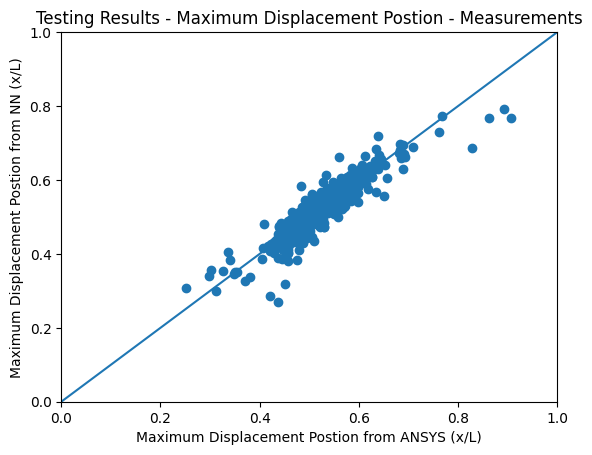

0.6808514188123784

In [36]:
plt.scatter(plot_df["position_ratio_ANSYS"],plot_df["position_ratio_NN"])
#plt.loglog()
plt.plot([0, 1],[0, 1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Maximum Displacement Postion from ANSYS (x/L)")
plt.ylabel("Maximum Displacement Postion from NN (x/L)")
plt.title("Testing Results - Maximum Displacement Postion - Measurements")
plt.show()

mean_squared_error(plot_df["position_ratio_ANSYS"],plot_df["position_ratio_NN"])
r2_score(plot_df["position_ratio_ANSYS"],plot_df["position_ratio_NN"])

In [37]:
clear_session()
del model
gc.collect()

0

In [38]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                            _3:  4.2 MiB
                           ___:  2.0 MiB
                          data:  2.0 MiB
                           _34:  2.0 MiB
                             x:  1.3 MiB
                       x_train:  1.1 MiB
           x_train_transformed: 759.9 KiB
                             y: 438.4 KiB
                       y_train: 350.7 KiB
                        x_test: 272.3 KiB


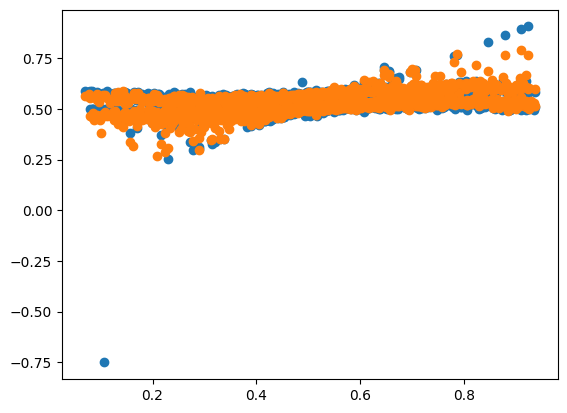

In [39]:
plt.scatter(plot_df["flange_ratio"],plot_df["position_ratio_ANSYS"])

plt.scatter(plot_df["flange_ratio"],plot_df["position_ratio_NN"])

In [40]:
plot_df['support'] = plot_df['support'].map({'Fixed_Fixed': 'Fixed Fixed', 'Fixed_Free': 'Fixed Free', 'Pinned_Pinned': 'Pinned Pinned','Pinned_Fixed':'Pinned Fixed'})

plot_fixed_fixed_df = plot_df[plot_df['support'].eq('Fixed Fixed')]
plot_fixed_free_df = plot_df[plot_df['support'].eq('Fixed Free')]
plot_pinned_pinned_df = plot_df[plot_df['support'].eq('Pinned Pinned')]
plot_pinned_fixed_df = plot_df[plot_df['support'].eq('Pinned Fixed')]

C:\Users\austi\AppData\Local\Temp\ipykernel_13528\3871681736.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


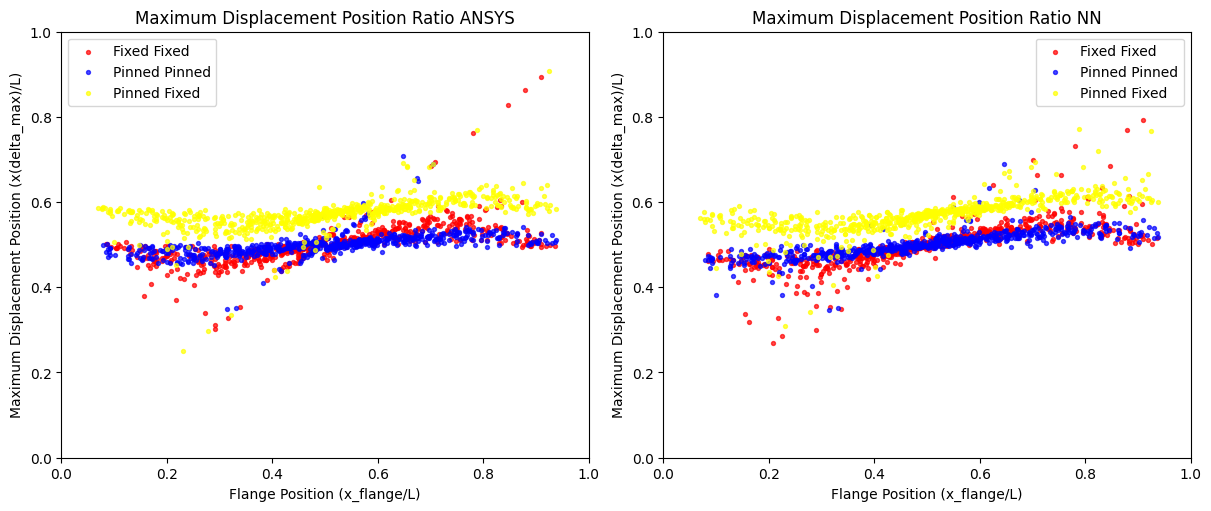

In [41]:
fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12, 5))
axes = axes.flatten()

axes[0].scatter(plot_fixed_fixed_df["flange_ratio"],plot_fixed_fixed_df["position_ratio_ANSYS"],c='r',label="Fixed Fixed",alpha=0.7,s=8)
#axes[0].scatter(plot_fixed_free_df["flange_ratio"],plot_fixed_free_df["position_ratio_ANSYS"],c='g',label="Fixed Free",alpha=0.7,s=8)
axes[0].scatter(plot_pinned_pinned_df["flange_ratio"],plot_pinned_pinned_df["position_ratio_ANSYS"],c='b',label="Pinned Pinned",alpha=0.7,s=8)
axes[0].scatter(plot_pinned_fixed_df["flange_ratio"],plot_pinned_fixed_df["position_ratio_ANSYS"],c='yellow',label="Pinned Fixed",alpha=0.7,s=8)



"""axes[0].plot(plot_linspace,plot_WACHEL_DESIGN_displacement_PP_mils, label='Wachel Design')
axes[0].plot(plot_linspace,plot_WACHEL_MARGINAL_displacement_PP_mils, label='Wachel Marginal')
axes[0].plot(plot_linspace,plot_WACHEL_CORRECTION_displacement_PP_mils, label='Wachel Correction')
axes[0].plot(plot_linspace,plot_WACHEL_DANGER_displacement_PP_mils, label='Wachel Danger')"""

axes[0].set_title('Maximum Displacement Position Ratio ANSYS')
axes[0].set_xlim([0,1])
axes[0].set_ylim([0,1])
axes[0].set_xlabel('Flange Position (x_flange/L)')
axes[0].set_ylabel('Maximum Displacement Position (x(delta_max)/L)')


#add_inline_labels(axes[0], with_overall_progress=True, fontsize="small",debug=False)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(labels,markerscale=1)

axes[1].scatter(plot_fixed_fixed_df["flange_ratio"],plot_fixed_fixed_df["position_ratio_NN"],c='r',label="Fixed Fixed",alpha=0.7,s=8)
#axes[1].scatter(plot_fixed_free_df["flange_ratio"],plot_fixed_free_df["position_ratio_NN"],c='g',label="Fixed Free",alpha=0.7)
axes[1].scatter(plot_pinned_pinned_df["flange_ratio"],plot_pinned_pinned_df["position_ratio_NN"],c='b',label="Pinned Pinned",alpha=0.7,s=8)
axes[1].scatter(plot_pinned_fixed_df["flange_ratio"],plot_pinned_fixed_df["position_ratio_NN"],c='yellow',label="Pinned Fixed",alpha=0.7,s=8)


"""axes[1].plot(plot_linspace,plot_WACHEL_DESIGN_displacement_PP_mils, label='Wachel Design')
axes[1].plot(plot_linspace,plot_WACHEL_MARGINAL_displacement_PP_mils, label='Wachel Marginal')
axes[1].plot(plot_linspace,plot_WACHEL_CORRECTION_displacement_PP_mils, label='Wachel Correction')
axes[1].plot(plot_linspace,plot_WACHEL_DANGER_displacement_PP_mils, label='Wachel Danger')
"""
axes[1].set_title('Maximum Displacement Position Ratio NN')
axes[1].set_xlim([0,1])
axes[1].set_ylim([0,1])
axes[1].set_xlabel('Flange Position (x_flange/L)')
axes[1].set_ylabel('Maximum Displacement Position (x(delta_max)/L)')


#add_inline_labels(axes[1], with_overall_progress=True, fontsize="small",debug=False)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(labels,markerscale=1)

fig.show()